# Does the mask effect the VCS break point?

Our thorough and on-going exploration of the structure function for oddly shaped masks has demonstrated that the slope is dominated by the mask on most of the relevant scales. Since the VCS is inherently linked to this slope, it suggests that it too should show this sensitivity. Thus the slopes will definitely be affected, and should return $m\approx1.5$, where $m$ is the structure function slope, but will it also cause the break point to change? This break point is the resolution limit of the data [(Lazarian & Pogosyan, 2006)](http://adsabs.harvard.edu/abs/2006ApJ...652.1348L). Even without the inclusion of noise in simulation, we see a change in the position of the break.

In [86]:
%matplotlib inline

In [87]:
from spectral_cube import SpectralCube
cube = SpectralCube.read("/Users/eric/Dropbox/AstroStatistics/Design4_21_0_0_flatrho_0021_13co.fits")

In [88]:
from turbustat.statistics import VCS

Breaks found from spline are: [-1.19382003 -0.89962945 -0.60205999]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     3284.
Date:                Mon, 21 Mar 2016   Prob (F-statistic):          4.07e-220
Time:                        23:19:47   Log-Likelihood:                -389.24
No. Observations:                 495   AIC:                             782.5
Df Residuals:                     493   BIC:                             790.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------

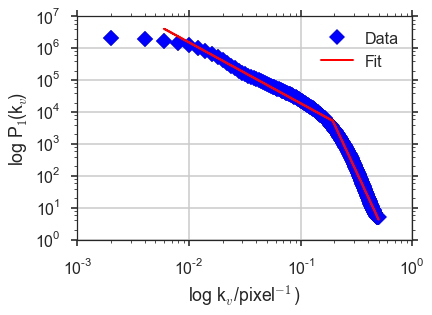

In [108]:
vcs_clean = VCS(cube).run(verbose=True)

In [104]:
print([(slop, err) for slop, err in zip(vcs_clean.slopes, vcs_clean.slope_errs)])

[(-1.9108164313550606, 0.01609584638707879), (-7.535453828029417, 0.044393727235689219)]


The fit gives slopes of $-1.91\pm0.02$ and $-7.54\pm0.04$, and a break at ~5.1 pixels. The difference between the slopes is $-4/m$, so we find $m=0.7$.

Now what happens when I start masking?

In [90]:
masked_cube = cube.with_mask(cube > cube.mean())

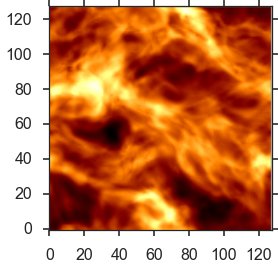

In [91]:
p.imshow(masked_cube.moment0().value, origin='lower', cmap='afmhot')

Breaks found from spline are: [-1.46852108 -1.19382003 -0.89962945 -0.60205999 -0.4271284 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     3599.
Date:                Mon, 21 Mar 2016   Prob (F-statistic):          1.08e-228
Time:                        23:13:30   Log-Likelihood:                -356.05
No. Observations:                 495   AIC:                             716.1
Df Residuals:                     493   BIC:                             724.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------

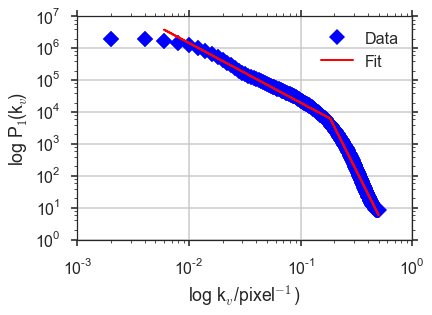

In [92]:
vcs_masked = VCS(masked_cube).run(verbose=True)

In [93]:
print(vcs_masked.brk_err)

0.0122812865175


In [109]:
print([(slop, err) for slop, err in zip(vcs_masked.slopes, vcs_masked.slope_errs)])

[(-1.8727869476340779, 0.015508154579274434), (-6.983839275664506, 0.03973454319892631)]


The difference in the slopes has decreased from $-5.62\pm0.04$ to $-5.11\pm0.04$. The break point has not moved significantly. We now have $m=0.78$.

Increasing the mask threshold:

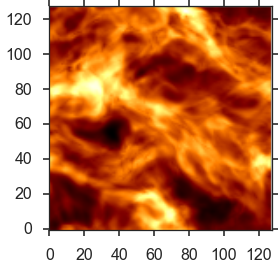

In [94]:
masked_cube_70 = cube.with_mask(cube > cube.percentile(70))
p.imshow(masked_cube_70.moment0().value, origin='lower', cmap='afmhot')

Breaks found from spline are: [-1.19382003 -0.89962945 -0.60205999]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     3284.
Date:                Mon, 21 Mar 2016   Prob (F-statistic):          4.07e-220
Time:                        23:13:34   Log-Likelihood:                -389.24
No. Observations:                 495   AIC:                             782.5
Df Residuals:                     493   BIC:                             790.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------

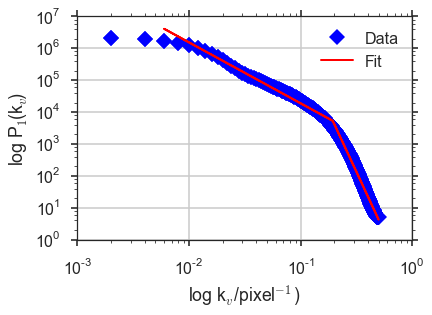

In [95]:
vcs_masked_70 = VCS(masked_cube_70).run(verbose=True)

In [110]:
print([(slop, err) for slop, err in zip(vcs_masked_70.slopes, vcs_masked_70.slope_errs)])

[(-1.9108164580331877, 0.016095843108132023), (-7.5354537927887302, 0.04439371819207235)]


The fit has converged remarkably close to the unmasked data. Hmm...

Masking at the 93th percentile? This completely removes some spectra.

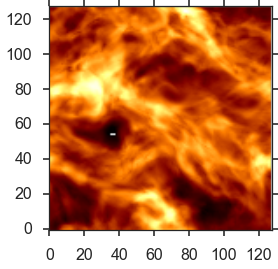

In [96]:
masked_cube_93 = cube.with_mask(cube > cube.percentile(93))
p.imshow(masked_cube_93.moment0().value, origin='lower', cmap='afmhot')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     6120.
Date:                Mon, 21 Mar 2016   Prob (F-statistic):          4.33e-280
Time:                        23:30:50   Log-Likelihood:                -154.25
No. Observations:                 495   AIC:                             312.5
Df Residuals:                     493   BIC:                             320.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0011      0.031     31.844      0.0

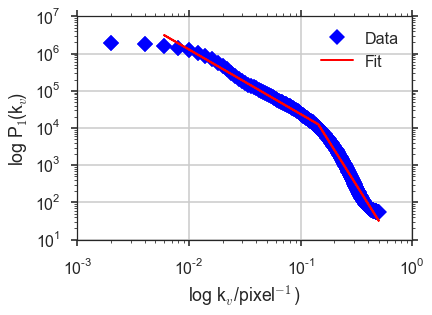

In [117]:
vcs_masked_93 = VCS(masked_cube_93).run(verbose=True, breaks=-0.9)

In [118]:
print([(slop, err) for slop, err in zip(vcs_masked_93.slopes, vcs_masked_93.slope_errs)])

[(-1.7355690041491698, 0.021001509778810018), (-4.7869927487605572, 0.041169841198553082)]


$m=1.3$. As soon as those masked regions show up, the break point becomes particularly indistinct. This causes the slopes to converge, the $m=3/2$ limit. The increased power in the noise is having the same effect as smoothing over a larger region.

Does this hold true if I actually smooth/downsample the data?

In [98]:
from astropy.wcs import WCS
downgraded_wcs = cube.wcs.copy()
downgraded_wcs.wcs.cdelt[2] *= 2.
data = cube.filled_data[:].value
data[np.isnan(data)] = 0.0
downgraded_cube = SpectralCube(data=nd.zoom(data, (0.5, 1., 1.))*cube.unit, wcs=downgraded_wcs)
downgraded_cube

SpectralCube with shape=(250, 128, 128):
 n_x:    128  type_x: RA---CAR  unit_x: deg    range:   179.999664 deg:  180.000330 deg
 n_y:    128  type_y: DEC--CAR  unit_y: deg    range:     0.000005 deg:    0.000671 deg
 n_s:    250  type_s: VOPT      unit_s: m / s  range:      -20.040 m / s:   19939.877 m / s

Breaks found from spline are: [-0.59859946]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     7988.
Date:                Mon, 21 Mar 2016   Prob (F-statistic):          6.92e-188
Time:                        23:31:05   Log-Likelihood:                 151.91
No. Observations:                 245   AIC:                            -299.8
Df Residuals:                     243   BIC:                            -292.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const   

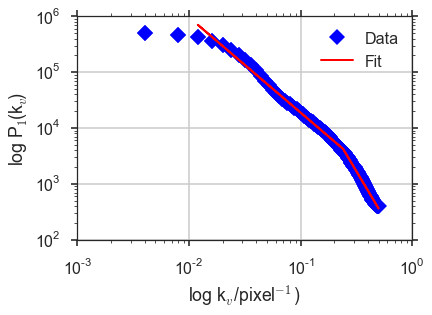

In [119]:
vcs_downgrade = VCS(downgraded_cube).run(verbose=True, breaks=None)

In [112]:
print([(slop, err) for slop, err in zip(vcs_downgrade.slopes, vcs_downgrade.slope_errs)])

[(-1.7082764862189657, 0.0099385504139785398), (-3.3561555024270286, 0.03512571873738126)]


This would give $m=2.4$, which doesn't make any sense. I think this has reached the unresolved regime and the asymptotic solution no longer holds.

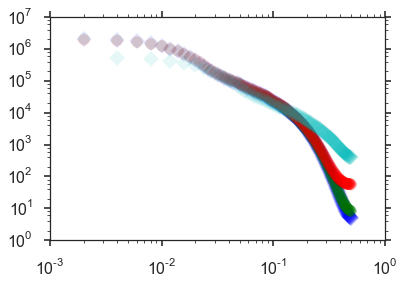

In [120]:
p.loglog(vcs_clean.vel_freqs, vcs_clean.ps1D, 'bD', alpha=0.05)
p.loglog(vcs_masked.vel_freqs, vcs_masked.ps1D, 'go', alpha=0.05)
p.loglog(vcs_masked_93.vel_freqs, vcs_masked_93.ps1D, 'ro', alpha=0.05)
p.loglog(vcs_downgrade.vel_freqs, vcs_downgrade.ps1D, 'cD', alpha=0.05)